In [1]:
# get the data from MNIST Library for hand written digits

# The images which we will be working with are black and white images of size 28 x 28 pixels, or 784 pixels total. Our features will be the pixel values for each pixel. Either the pixel is "white" (blank with a 0), or there is some pixel value.

# We will try to correctly predict what number is written down based solely on the image data in the form of an array. This type of problem (Image Recognition) is a great use case for Deep Learning Methods!

In [2]:
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz

In [3]:
type(mnist)

Out[ 3 ]: collections.Datasets

In [4]:
type(mnist.train.images)

Out[ 4 ]: numpy.ndarray

In [5]:
mnist.train.images[2].shape

Out[ 6 ]: (784,)

In [6]:
sample = mnist.train.images[2].reshape(28,28)

In [7]:
import matplotlib.pyplot as plt

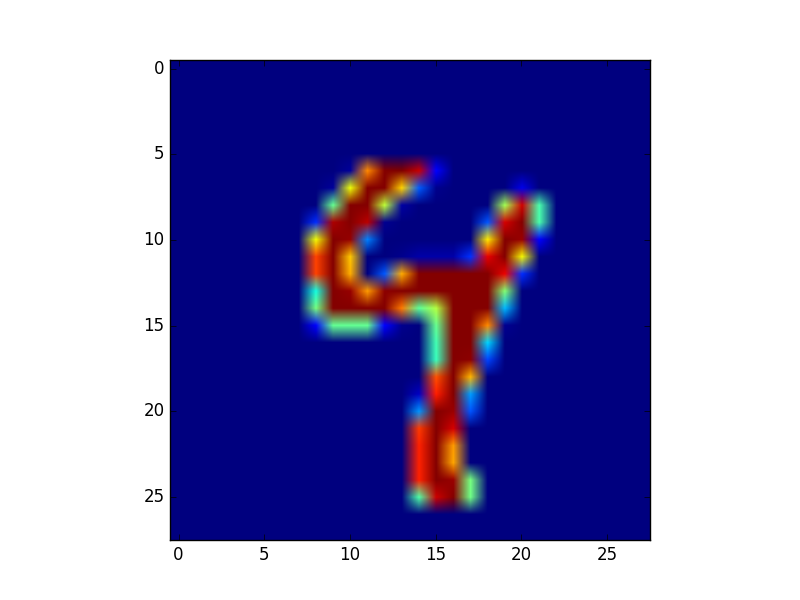

In [8]:
plt.imshow(sample)
display()

In [9]:
# Parameters
# Learning Rate - How quickly to adjust the cost function.
# Training Epochs - How many training cycles to go through
# Batch Size - Size of the 'batches' of training data
# a lot of experience is required to get good parameter values.

learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [10]:
# Network Parameters
n_hidden_1 = 256 # 1st layer number of features
n_hidden_2 = 256 # 2nd layer number of features
n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)
n_samples = mnist.train.num_examples

In [11]:
#Tensor flow graph input
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])

In [12]:
# Methodology

#First we receive the input data array and then to send it to the first hidden layer. Then the data will begin to have a weight attached to it between layers (remember this is initially a random value) and then sent to a node to undergo an activation function (along with a Bias). Then it will continue on to the next hidden layer, and so on until the final output layer. In our case, we will just use two hidden layers, the more you use the longer the model will take to run (but it has more of an opportunity to possibly be more accurate on the training data).

#Once the transformed "data" has reached the output layer we need to evaluate it. Here we will use a loss function (also called a cost function) to evaluate how far off we are from the desired result. In this case, how many of the classes we got correct.

#Then we will apply an optimization function to minimize the cost (lower the error). This is done by adjusting weight values accordingly across the network. In out example, we will use the Adam Optimizer, which keep in mind, relative to other mathematical concepts, is an extremely recent development.

#We can adjust how quickly to apply this optimization by changing our earlier learning rate parameter. The lower the rate the higher the possibility for accurate training results, but that comes at the cost of having to wait (physical time wise) for the results. Of course, after a certain point there is no benefit to lower the learning rate.

#Now we will create our model, we'll start with 2 hidden layers, which use the RELU activation function, which is a very simple rectifier function which essentially either returns x or zero. For our final output layer we will use a linear activation with matrix multiplication:

In [13]:
def multilayer_perceptron(x, weights, biases):
    '''
    x : Place Holder for Data Input
    weights: Dictionary of weights
    biases: Dicitionary of biases
    '''
    
    # First Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    
    # Second Hidden layer with RELU activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    # Last Output layer with linear activation
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

In [14]:
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [15]:
# Construct model
pred = multilayer_perceptron(x, weights, biases)

In [16]:
# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [17]:
# Initializing the variables
init = tf.initialize_all_variables()

In [18]:
#next_batch()
#Before we get started I want to cover one more convenience function in our mnist data object called next_batch. This returns a tuple in the form (X,y) with an array of the data and a y array indicating the class in the form of a binary array. For example:

Xsamp,ysamp = mnist.train.next_batch(1)

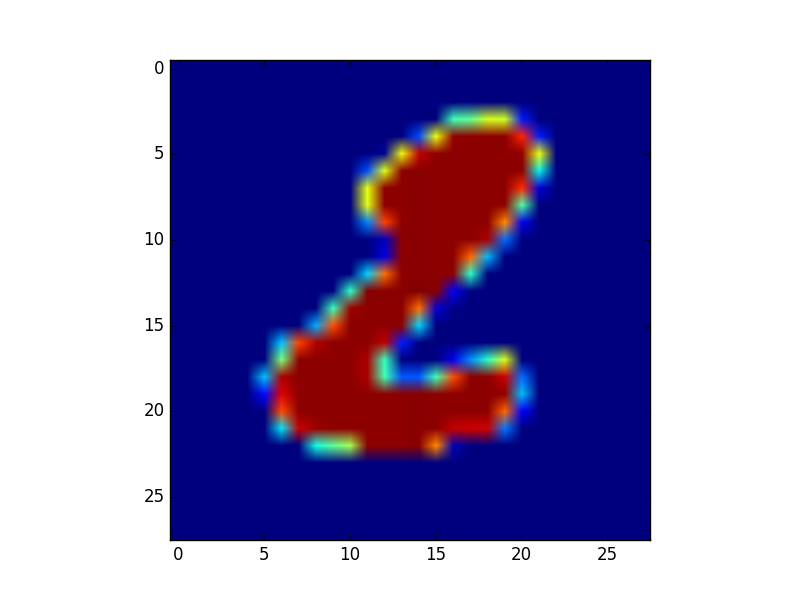

In [19]:
plt.imshow(Xsamp.reshape(28,28))
display()

In [20]:
print(ysamp)

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]

In [21]:
# Launch the session
sess = tf.InteractiveSession()

# Intialize all the variables
sess.run(init)

# Training Epochs
# Essentially the max amount of loops possible before we stop
# May stop earlier if cost/loss limit was set
for epoch in range(training_epochs):

    # Start with cost = 0.0
    avg_cost = 0.0

    # Convert total number of batches to integer
    total_batch = int(n_samples/batch_size)

    # Loop over all batches
    for i in range(total_batch):

        # Grab the next batch of training data and labels
        batch_x, batch_y = mnist.train.next_batch(batch_size)

        # Feed dictionary for optimization and loss value
        # Returns a tuple, but we only need 'c' the cost
        # So we set an underscore as a "throwaway"
        _, c = sess.run([optimizer, cost], feed_dict={x: batch_x, y: batch_y})

        # Compute average loss
        avg_cost += c / total_batch

    print("Epoch: {} cost={:.4f}".format(epoch+1,avg_cost))

print("Model has completed {} Epochs of Training".format(training_epochs))

Epoch: 1 cost=184.0861
Epoch: 2 cost=39.6897
Epoch: 3 cost=24.8323
Epoch: 4 cost=17.3981
Epoch: 5 cost=12.4758
Epoch: 6 cost=9.2429
Epoch: 7 cost=6.8520
Epoch: 8 cost=5.1526
Epoch: 9 cost=3.8887
Epoch: 10 cost=2.9462
Epoch: 11 cost=2.1960
Epoch: 12 cost=1.6186
Epoch: 13 cost=1.1633
Epoch: 14 cost=0.9874
Epoch: 15 cost=0.7169
Model has completed 15 Epochs of Training

In [22]:
# Test model
correct_predictions = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

In [23]:
print(correct_predictions[0])

Tensor("strided_slice_2:0", shape=(), dtype=bool)

In [24]:
correct_predictions = tf.cast(correct_predictions, "float")

In [25]:
print(correct_predictions[0])

Tensor("strided_slice_3:0", shape=(), dtype=float32)

In [26]:
accuracy = tf.reduce_mean(correct_predictions)

In [27]:
type(accuracy)

Out[ 42 ]: tensorflow.python.framework.ops.Tensor

In [28]:
mnist.test.labels

Out[ 43 ]: 
array([[0., 0., 0., ..., 1., 0., 0.],
 [0., 0., 1., ..., 0., 0., 0.],
 [0., 1., 0., ..., 0., 0., 0.],
 ...,
 [0., 0., 0., ..., 0., 0., 0.],
 [0., 0., 0., ..., 0., 0., 0.],
 [0., 0., 0., ..., 0., 0., 0.]])

In [29]:
mnist.test.images

Out[ 44 ]: 
array([[0., 0., 0., ..., 0., 0., 0.],
 [0., 0., 0., ..., 0., 0., 0.],
 [0., 0., 0., ..., 0., 0., 0.],
 ...,
 [0., 0., 0., ..., 0., 0., 0.],
 [0., 0., 0., ..., 0., 0., 0.],
 [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [30]:
print("Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))

Accuracy: 0.9455

In [31]:
#94% not too shabby! But this actually isn't anywhere near as good as it could be. Running for more training epochs with this data (around 20,000) can produce accuracy around 99% or more no. of hidden layers can be introduced.